In [6]:
import pandas as pd

df = pd.read_csv(r'data/archive (1)/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['Churn'].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()


np.int64(11)

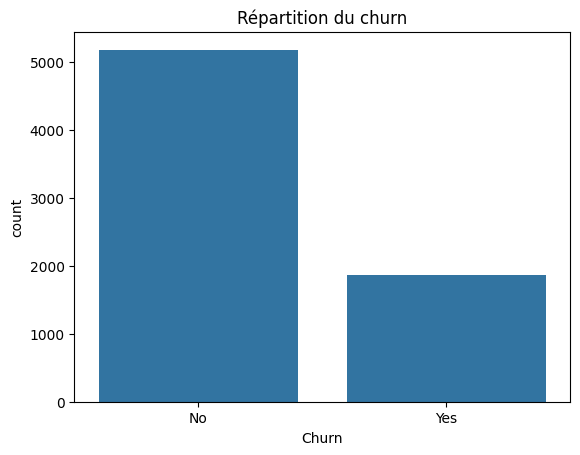

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Répartition du churn')
plt.show()


In [14]:
df.corr(numeric_only=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


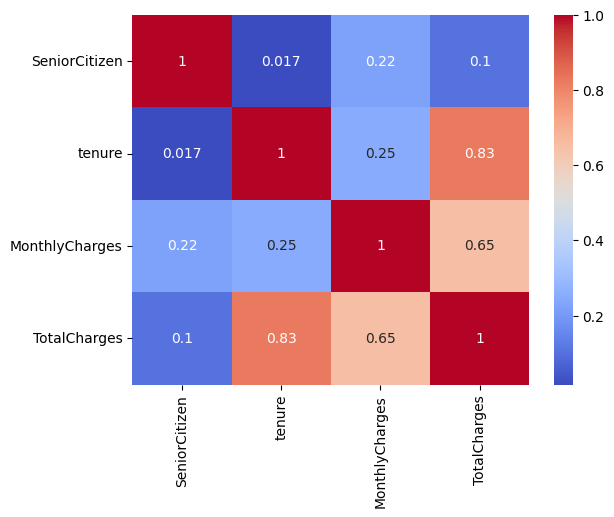

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


In [17]:
# Vérifier les valeurs manquantes après conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Valeurs manquantes dans TotalCharges :", df['TotalCharges'].isna().sum())

# Remplacer les NaN par 0 (ou tu peux choisir df['TotalCharges'].mean() si tu préfères)
df['TotalCharges'].fillna(0, inplace=True)

# Vérif
df['TotalCharges'].isna().sum()




Valeurs manquantes dans TotalCharges : 0


np.int64(0)

In [18]:
# Encoder la variable cible
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Vérifier la distribution
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [19]:
# Supprimer customerID
df.drop('customerID', axis=1, inplace=True)

# Identifier les colonnes object restantes
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

# Encoder en variables numériques (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.head()


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])



In [25]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']



In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Taille train :", X_train.shape)
print("Taille test :", X_test.shape)





Taille train : (5634, 30)
Taille test : (1409, 30)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[927 108]
 [164 210]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



ROC-AUC : 0.84


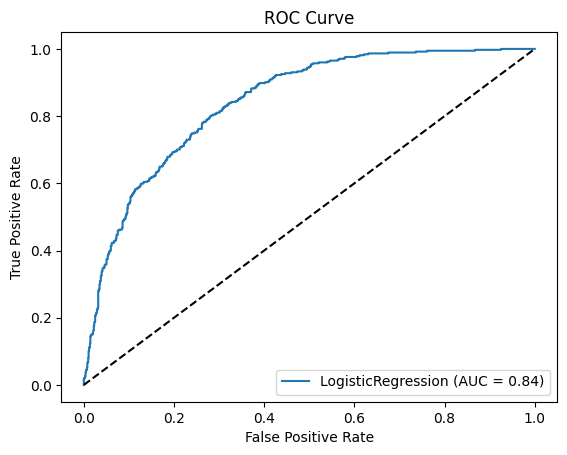

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_proba = clf.predict_proba(X_test)[:, 1]  # Proba de churn=1
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC : {auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f'LogisticRegression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"RandomForest ROC-AUC : {auc_rf:.2f}")


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

RandomForest ROC-AUC : 0.82


In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))

auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"XGBoost ROC-AUC : {auc_xgb:.2f}")


C:\Users\user\Desktop\ChurnPredict-Telco\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:05:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.58      0.50      0.54       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409

XGBoost ROC-AUC : 0.82


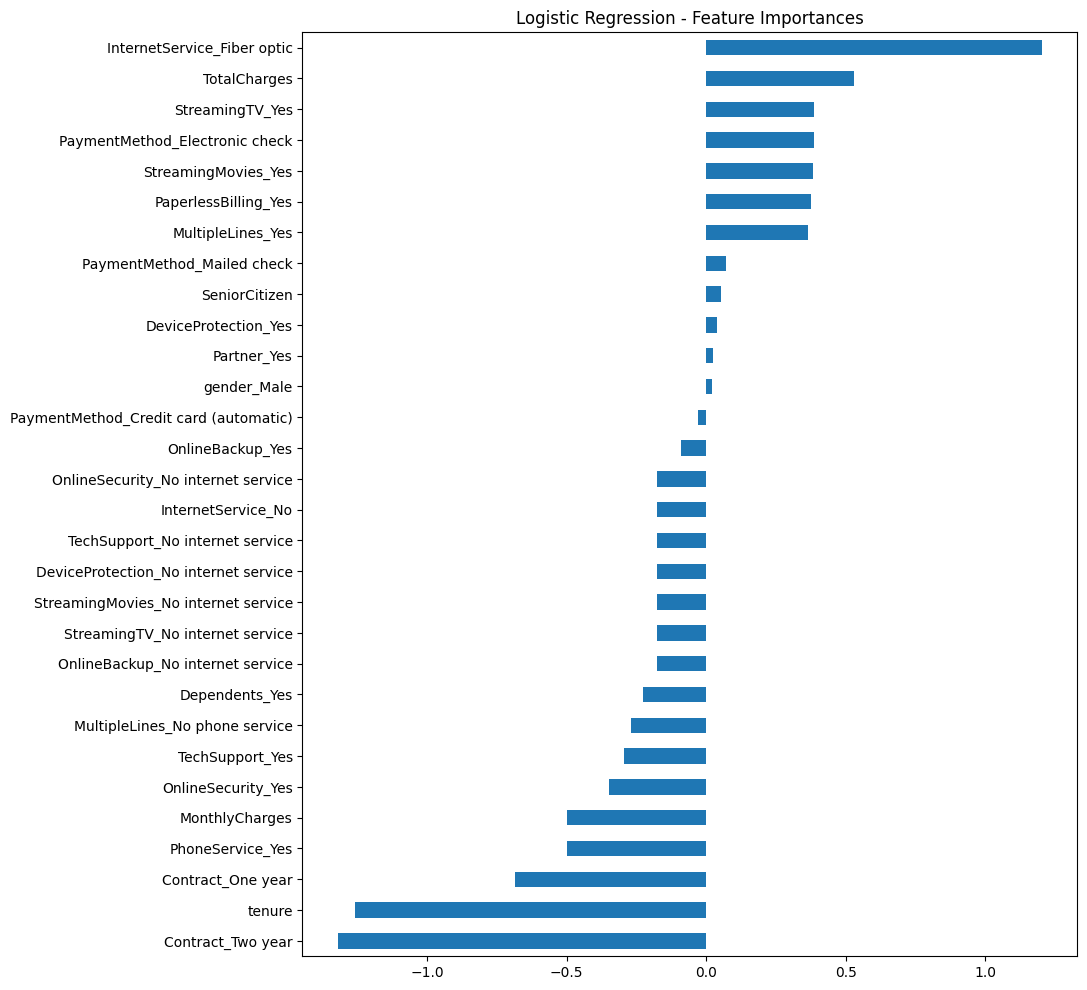

In [33]:
coeffs = pd.Series(clf.coef_[0], index=X.columns).sort_values()
coeffs.plot(kind='barh', figsize=(10, 12))
plt.title("Logistic Regression - Feature Importances")
plt.show()


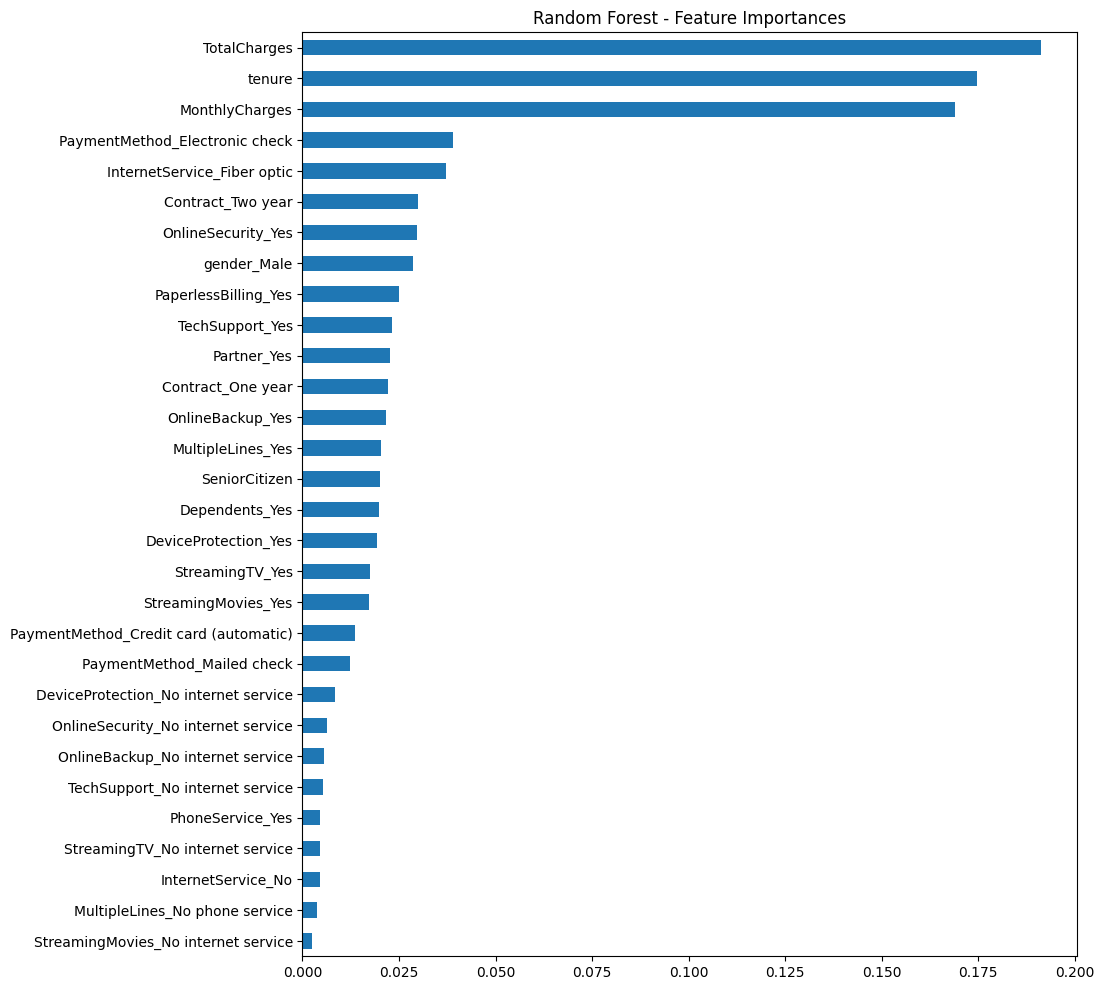

In [34]:
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
importances_rf.plot(kind='barh', figsize=(10, 12))
plt.title("Random Forest - Feature Importances")
plt.show()


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train, y_train)

print("Best params :", grid_rf.best_params_)
print("Best ROC-AUC :", grid_rf.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best params : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC-AUC : 0.8448711210589797


  0%|          | 0/50 [00:00<?, ?it/s]

shap_values[1] shape: (30, 2)
X_sample shape: (50, 30)


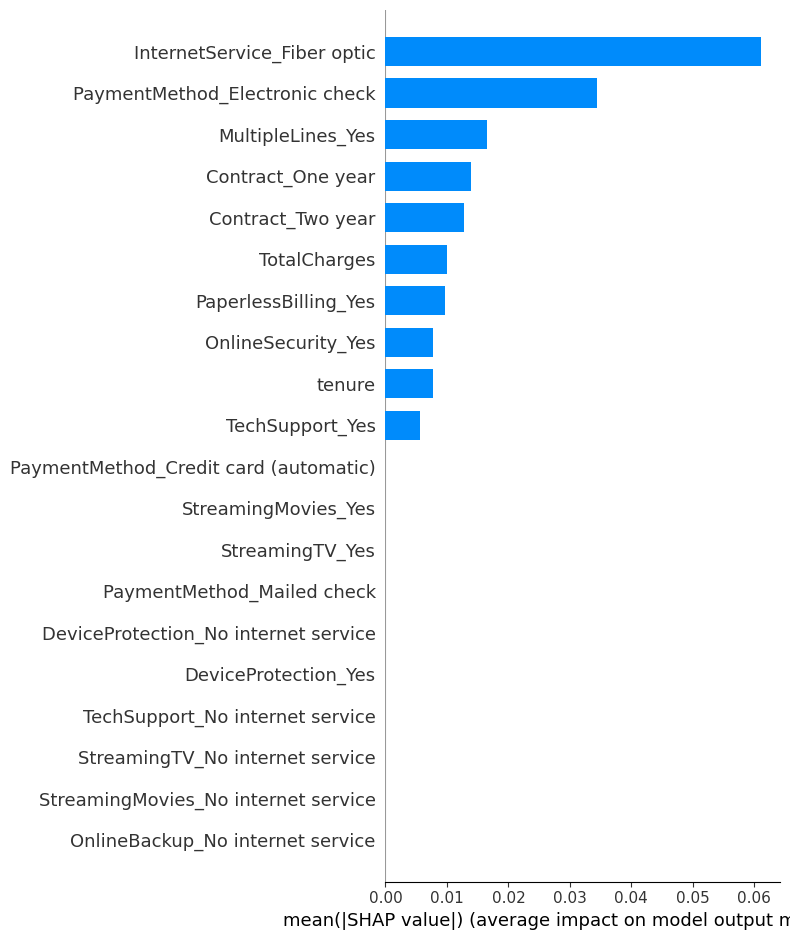

In [46]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Sample d'entraînement pour le background
X_background = shap.utils.sample(X_train, 50, random_state=42)

# Sample de test à expliquer
X_sample = shap.utils.sample(X_test, 50, random_state=42)

# Création de l'explainer avec .predict_proba (et pas .predict)
explainer = shap.KernelExplainer(grid_rf.best_estimator_.predict_proba, X_background)

# Explication des probabilités de la classe 1
shap_values = explainer.shap_values(X_sample)

# Impression des formes
print("shap_values[1] shape:", np.array(shap_values[1]).shape)
print("X_sample shape:", X_sample.shape)

# S'assurer que les shapes matchent bien
shap_array = np.array(shap_values[1])
if shap_array.shape != X_sample.shape:
    shap_array = shap_array.T

# Tracé final
shap.summary_plot(shap_array, X_sample, feature_names=X_sample.columns, plot_type="bar")
